CHECKED AND REVISED BY: yatmelis freites 

CONNECTING MYSQL DATABASE TO PYTHON

In [2]:
%pip install mysql-connector-python

#is used to install the mysql-connector-python library, which allows Python programs to connect to and interact with MySQL databases.

In [3]:
import mysql.connector as sql   # used to establish a connection to the MySQL database and make queries.
mydb= sql.connect(
    host= "localhost",
    user="root",
    password="1234",    
    database="transaction")
#This code above is used to connect to a MySQL database running on the local machine (localhost) using the root account, with the password "1234", 
#and pointing to a specific database named "transaction" to perform operations on it.
print(mydb) 
# This code above is used to print if the database was found and successfully connected to Python. 

IMPORTING NECESSARY LIBRARIES TO PLOT DIAGRAMS.

In [4]:
#used for mathematical operations
import numpy as np 
#Seaborn simplifies the process of creating beautiful and informative graphs like scatter plots, bar charts, box plots, heatmaps, and more.
import seaborn as sns 
#Without this, the queries will be present in list or tuples. And to make it more readable, pandas can turn the data into structured table. 
#This is essential for working with data as DataFrames, which simplifies many data analysis tasks.
import pandas as pd
#this is essential for creating visualizations
import matplotlib.pyplot as plt


%reload_ext autoreload
%autoreload 2

CREATING DATAFRAMES FROM MYSQL DATABASE

Before plotting diagrams, the values of the each tables were checked and modified to avoid future errors.

In [5]:


# Create a cursor object to interact with the database
cursor = mydb.cursor()

# Execute a SQL query to select all records from the "companies" table
cursor.execute("SELECT * FROM companies")

# Fetch all the results from the query and store them in 'results'
results = cursor.fetchall()

# Get the column names from the query result and store them in 'columns'
columns = [column[0] for column in cursor.description]

# Create a pandas DataFrame using the fetched results and set the column names
companies = pd.DataFrame(results, columns=columns)

# Display the DataFrame
companies

,company_id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site\r
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9\r
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars\r
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110\r
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings\r
...,...,...,...,...,...,...
95,b-2602,Placerat LLP,05 43 67 24 41,tellus.suspendisse@hotmail.org,Netherlands,https://zoom.us/sub\r
96,b-2606,Sed Est Corp.,04 58 02 37 91,tempor.bibendum@google.couk,Canada,https://instagram.com/sub/cars\r
97,b-2610,Egestas Nunc Sed Limited,06 01 02 70 47,vitae@hotmail.edu,Italy,https://walmart.com/one\r
98,b-2614,Rutrum Non Inc.,02 66 31 61 09,neque@protonmail.net,Germany,https://netflix.com/site\r


In [6]:

cursor = mydb.cursor()
cursor.execute("SELECT * FROM user")
results = cursor.fetchall()
columns = [column[0] for column in cursor.description]
user = pd.DataFrame(results, columns=columns)
user

,id,name,surname,phone,email,birthdate,country,city,postal_code,address
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,"Nov 17, 1985",United States,Lowell,73544,348-7818 Sagittis St.
1,2,Garrett,Mcconnell,(718) 257-2412,integer.vitae.nibh@protonmail.org,"Aug 23, 1992",United States,Des Moines,59464,903 Sit Ave
2,3,Ciaran,Harrison,(522) 598-1365,interdum.feugiat@aol.org,"Apr 29, 1998",United States,Columbus,56518,736-2063 Tellus St.
3,4,Howard,Stafford,1-411-740-3269,ornare.egestas@icloud.edu,"Feb 18, 1989",United States,Kailua,77417,Ap #545-2244 Erat. Rd.
4,5,Hayfa,Pierce,1-554-541-2077,et.malesuada.fames@hotmail.org,"Sep 26, 1998",United States,Sandy,31564,341-2821 Ultrices Av.
...,...,...,...,...,...,...,...,...,...,...
270,271,Leandra,Cherry,089-285-7016,lobortis.quis@hotmail.ca,"Sep 2, 1991",Canada,Gander,H6S 6M9,554-9293 Sollicitudin Av.
271,272,Hedwig,Gilbert,064-204-8788,sem.eget@icloud.edu,"Apr 16, 1991",Canada,Tuktoyaktuk,Q4C 3G7,"P.O. Box 496, 5145 Sapien Road"
272,273,Hilary,Ferguson,060-710-1604,sapien.molestie.orci@google.edu,"Nov 3, 1981",Canada,Pangnirtung,12T 5G4,Ap #736-4628 Cras St.
273,274,Jameson,Hunt,024-732-2321,fringilla@protonmail.com,"Jan 29, 1982",Canada,Township of Minden Hills,B6V 6N4,224-4927 Praesent Ave


In [7]:
cursor = mydb.cursor()
cursor.execute("SELECT * FROM credit_cards")
results = cursor.fetchall()
columns = [column[0] for column in cursor.description]
credit_cards= pd.DataFrame(results, columns=columns)
credit_cards

,id,user_id,iban,pan,pin,cvv,track1,track2,expiring_date
0,CcU-2938,275,TR301950312213576817638661,5424465566813633,3257,984,%B8383712448554646^WovsxejDpwiev^86041142?7,%B7653863056044187=8007163336?3,10/30/22
1,CcU-2945,274,DO26854763748537475216568689,5142423821948828,9080,887,%B4621311609958661^UftuyfsSeimxn^0610628241?7,%B4149568437843501=5107140330?1,08/24/23
2,CcU-2952,273,BG45IVQL52710525608255,4556 453 55 5287,4598,438,%B2183285104307501^CddyytcUxwfdq^5907955430?9,%B6778580257827162=69068597400?7,06/29/21
3,CcU-2959,272,CR7242477244335841535,372461377349375,3583,667,%B7281111956795320^XocddijBckecd^09016253?3,%B4246154489281853=2805223916?8,02/24/23
4,CcU-2966,271,BG72LKTQ15627628377363,448566 886747 7265,4900,130,%B4728932322756223^JhlgvsuFbmwgj^72022894943?7,%B2318571115599881=8908215784?5,10/29/24
...,...,...,...,...,...,...,...,...,...
270,CcU-4828,5,BG11ILMJ30149367569464,4485252735942,2789,942,%B7763464626517588^KmqoxvwFiovcv^5003339322?4,%B4651147303850314=2105859161?2,09/04/22
271,CcU-4835,4,PT34592171131763200132583,3723 677744 22550,1149,680,%B6221188915952608^EnfmdemGugvnr^58053479562?5,%B8187762874317668=9107919781?6,01/08/24
272,CcU-4842,3,SA2156708581957118818229,3774 636724 83250,4655,750,%B2216216733758821^CsszvisPjqcfh^95081856902?1,%B2517312164209886=54047891?9,11/11/24
273,CcU-4849,2,SE2813123487163628531121,5223363813491514,9992,779,%B8844154447682199^JunfxuiCzhsrj^3805344275?5,%B2623983651705584=0207551226?9,03/21/25


In [8]:
cursor = mydb.cursor()
cursor.execute("SELECT * FROM products")
results = cursor.fetchall()
columns = [column[0] for column in cursor.description]
products = pd.DataFrame(results, columns=columns)
products

,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,$161.11,#7c7c7c,1,WH-4
1,2,Tarly Stark,$9.24,#919191,2,WH-3
2,3,duel tourney Lannister,$171.13,#d8d8d8,1.5,WH-2
3,4,warden south duel,$71.89,#111111,3,WH-1
4,5,skywalker ewok,$171.22,#dbdbdb,3.2,WH-0
...,...,...,...,...,...,...
95,96,dooku solo,$20.92,#282828,2.1,WH--91
96,97,jinn Winterfell,$65.25,#bababa,1,WH--92
97,98,Direwolf Littlefinger,$38.33,#bababa,2,WH--93
98,99,the duel,$151.78,#212121,1.5,WH--94


In [9]:
products['price'] = products['price'].replace('[\$,]', '', regex=True).astype(float)

products['price'] = products['price'].astype(float)
products['weight'] = products['weight'].astype(float)
products.info()
products.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    int64  
 1   product_name  100 non-null    object 
 2   price         100 non-null    float64
 3   colour        100 non-null    object 
 4   weight        100 non-null    float64
 5   warehouse_id  100 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Cecil Luna\AppData\Local\Temp\ipykernel_10544\820062475.py:1: SyntaxWarning: invalid escape sequence '\$'
  products['price'] = products['price'].replace('[\$,]', '', regex=True).astype(float)


,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4
1,2,Tarly Stark,9.24,#919191,2.0,WH-3
2,3,duel tourney Lannister,171.13,#d8d8d8,1.5,WH-2
3,4,warden south duel,71.89,#111111,3.0,WH-1
4,5,skywalker ewok,171.22,#dbdbdb,3.2,WH-0


In [10]:
cursor = mydb.cursor()
cursor.execute("SELECT * FROM transactions")
results = cursor.fetchall()
columns = [column[0] for column in cursor.description]
transactions = pd.DataFrame(results, columns=columns)
transactions

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.91850,-12.5276
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.96950,-117.5250
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.22270,-129.0500
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.35930,-100.5560
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.73810,158.2980
...,...,...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,CcU-3232,b-2390,2022-03-13 00:27:34,78.29,0,"83, 7, 17, 89",272,-24.31950,-11.4135
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"3, 2, 73, 1",250,8.01217,-64.6715
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,37,223,-77.86050,-172.3460
585,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.07510,-142.2420


In [11]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    object        
 5   declined     587 non-null    int64         
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    int64         
 8   lat          587 non-null    float64       
 9   longitude    587 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 46.0+ KB


In [12]:
transactions['amount'] = transactions['amount'].astype(float)

transactions.info()
transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    float64       
 5   declined     587 non-null    int64         
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    int64         
 8   lat          587 non-null    float64       
 9   longitude    587 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 46.0+ KB


,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980


In [13]:
transactions['declined'] = transactions['declined'].astype(str)
transactions['declined'] = transactions['declined'].replace('[0,]', 'not declined', regex=True).astype(str)
transactions['declined'] = transactions['declined'].replace('[1,]', 'declined', regex=True).astype(str)

transactions.info()
transactions.head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    float64       
 5   declined     587 non-null    object        
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    int64         
 8   lat          587 non-null    float64       
 9   longitude    587 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 46.0+ KB


,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,not declined,"71, 1, 19",92,81.91850,-12.5276
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,not declined,"47, 97, 43",170,-43.96950,-117.5250
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,not declined,"47, 67, 31, 5",275,-81.22270,-129.0500
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,not declined,"89, 83, 79",265,-34.35930,-100.5560
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,not declined,"43, 31",92,33.73810,158.2980
5,07A46D48-31A3-7E87-65B9-0DA902AD109F,CcU-3225,b-2386,2021-06-28 21:11:42,340.87,declined,"47, 23",272,38.83420,92.1905
6,09DE92CE-6F27-2BB7-13B5-9385B2B3B8E2,CcU-3071,b-2298,2021-05-11 20:40:06,303.05,declined,"67, 7",275,71.17060,10.5757
7,0A476ED9-0C13-1962-F87B-D3563924B539,CcU-4359,b-2302,2022-02-26 20:33:54,430.49,not declined,"29, 41, 11",221,-56.49010,114.8010
8,0BEB80B7-9D66-1707-CE4B-9DC7E71914B5,CcU-3141,b-2338,2022-03-04 14:54:35,288.81,declined,"19, 41, 29, 3",272,23.32640,-13.6037
9,0C7C3A33-9947-3BC1-846D-7BE3D0D17598,CcU-3309,b-2434,2021-04-10 20:58:41,103.44,declined,"89, 31",272,63.36150,-68.6667


EXERCISE 1: ONE NUMERICAL VARIABLE GRAPH

The histogram created using sns.histplot is visualizing a numerical variable (transaction amount). 

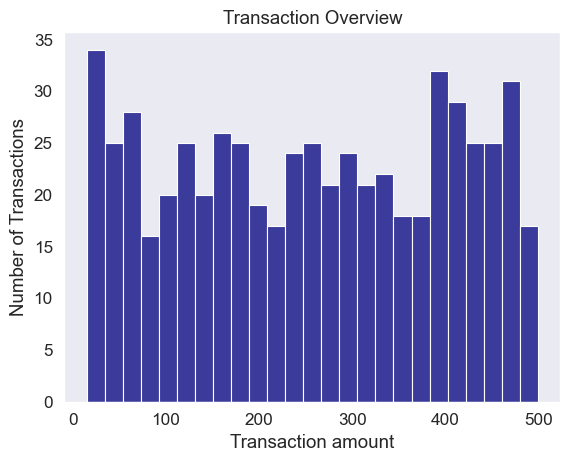

In [14]:

sns.set_style('dark')
sns.set_context('paper', font_scale=1.4)

#A histogram of transaction amounts is created using Seaborn.
#The code creates a histogram of the amount column from the transactions dataframe, 
# dividing the data into 25 bins, showing the frequency of transactions in each bin. 
# The bars are blue, and no KDE curve is shown.
sns.histplot( data=transactions ['amount'], color='navy', bins = 25)

#The plot is customized with titles and labels.
plt.title('Transaction Overview')  
plt.ylabel('Number of Transactions')  
plt.xlabel('Transaction amount')

#This displays the final plot.
plt.show()



In this Transaction Amount Overview, the bar graph shows that there are significantly more transactions under 100 euros than above 400 euros. This indicates that customers tend to spend more on products priced below 100 euros. Given this data, the company can maximize sales by:

1. Creating longer-duration campaigns to encourage customers to buy more products under 100 euros. For example, offering discounted prices or promotions like "buy 3 for the price of 2."

2. Implementing limited-time campaigns for products priced above 400 euros. Short-term offers can create a sense of urgency, motivating customers to purchase these higher-priced items.

3. Developing mixed campaigns that pair products over 400 euros with discounted items or freebies priced under 100 euros.

4. Introducing seasonal offers. A further study will be conducted to identify the months with lower and higher sales, as this campaign could significantly boost the company’s overall sales.

EXERCISE 2: TWO NUMERICAL VARIABLES GRAPH 
Each box represents the distribution of transaction amounts for a given year.


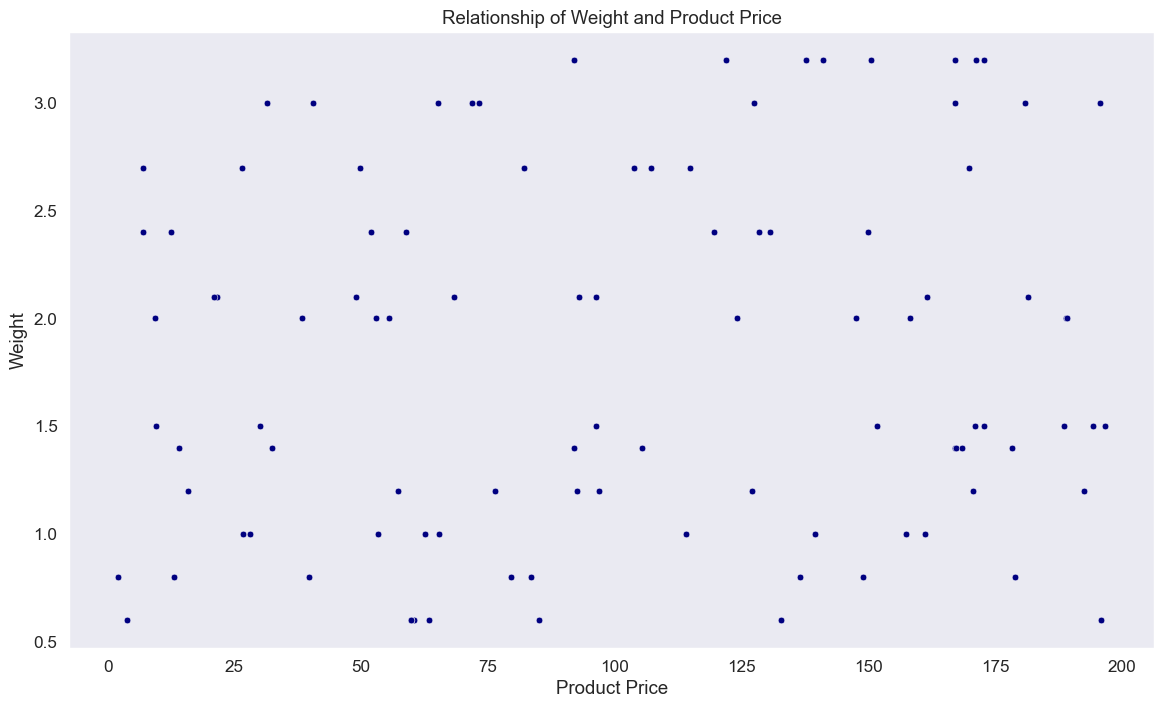

In [15]:
#This sets the figure size or the scatterplot.
plt.figure(figsize=(14, 8))

sns.scatterplot(x=products['price'], y=products['weight'], color= 'navy')
# Set font style and font size
sns.set_context('paper', font_scale=1.4)

plt.title('Relationship of Weight and Product Price')
plt.xlabel('Product Price')
plt.ylabel('Weight')
plt.show()

This scatterplot displays the relationship between product weight and price. If you look closely, you’ll notice that, generally, the heavier the product, the higher the price. This data can help the company avoid overpricing (which may reduce sales) or underpricing (which could hurt profits) for heavier products. Additionally, it can provide insights into how weight influences customer purchasing decisions, if at all, which can help tailor both marketing strategies and product design.

To make this analysis more actionable, the company should conduct customer research to determine whether weight significantly affects preferences for specific product types. This information could help the company either adjust product weights or better communicate the value of its products, regardless of weight.

EXERCISE 3: ONE CATEGORICAL VARIABLE GRAPH
A Pie graph is created using matplotlib because, this graph is not available in Seaborn.

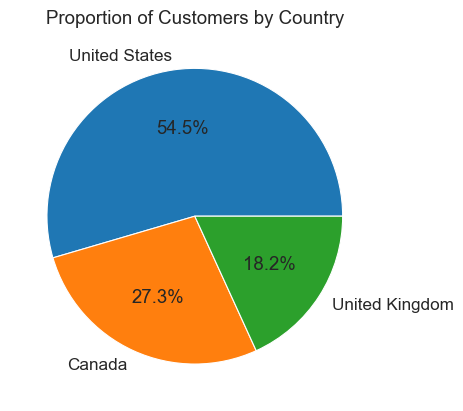

In [16]:

#This counts how many clients are from a specific country. 
country_counts = user['country'].value_counts()

#  A function from matplotlib that creates a pie chart because seaborn doesn't create one. 
# Then labels are set for each pie slice (in this case, the country names).
# Then autopct='%1.1f%%'  automatically labels each slice with its percentage, showing one decimal place. 
plt.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%')

# This line sets the title of the pie chart 
plt.title('Proportion of Customers by Country')

# This shows the plot
plt.show()

This graph illustrates the distribution of clients across three countries: the United States, the United Kingdom, and Canada. The largest segment in the chart belongs to the United States, indicating that the majority of transactions originate from this country, while the United Kingdom has the smallest segment. To expand the company's presence in the United States and boost sales in the United Kingdom, the following recommendations should be considered:

1. Conduct a Product Survey and Cross-Experimentation: Carry out a product survey in both the United States and the United Kingdom to identify the top-selling items in each market. Based on these findings, conduct cross-experimentation by introducing popular products from one country to the other. This will provide insights into whether clients in each country will be receptive to new product offerings.

2. Increase Sales with Limited-Time and Seasonal Offers: Introduce exclusive, time-sensitive, and seasonal discounts in both countries to stimulate demand and encourage repeat purchases. For example, holiday discounts or "buy one, get one free" offers could attract additional sales.

3. Establish Partnerships with Local Influencers: Collaborate with influencers or popular content creators in both countries to build brand awareness. Influencer partnerships can expand reach and credibility, especially in the United Kingdom, where visibility may need improvement.

EXERCISE 4: ONE CATEGORICAL VARIABLE AND ONE NUMERICAL VARIABLE GRAPH
This graph is composed of categorical variable (countries) and a numerical variable(transaction amount).


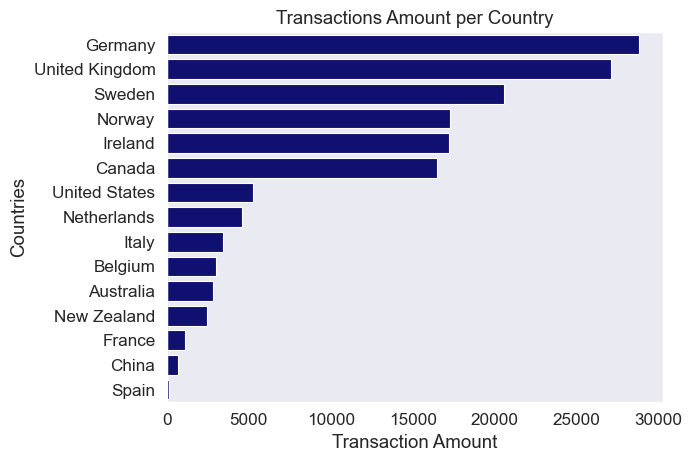

In [17]:
# This line merges two DataFrames, transactions and companies, using an inner join. 
# It matches rows where business_id in transactions matches company_id in companies.
merged_dataTransactionsAndCompanies = transactions.merge(companies, how='inner', left_on='business_id', right_on='company_id')

# Summing up the transaction amounts by country and sorted from lowest to highest
country_sales = merged_dataTransactionsAndCompanies.groupby('country')['amount'].sum().sort_values(ascending=False)

# Set overall style of the plot to a darker background
sns.set_style('dark')

# Set font style and font size
sns.set_context('paper', font_scale=1.4)

# This creates a bar plot.
# country_sales.index: This gives you the list of countries (categorical data) that you want to plot.
# country_sales.values gives the associated numerical data (transaction amounts).
sns.barplot(y=country_sales.index, x=country_sales.values, color='navy')

# These add titles and labels to the plot
plt.title('Transactions Amount per Country')  
plt.ylabel('Countries')  
plt.xlabel('Transaction Amount')  

# This display the plot
plt.show()

This graph shows the transaction amounts per country, arranged from lowest to highest. This report provides recommendations to improve transaction levels in countries with lower transaction volumes, such as Spain, China, and France.

And here are the actions that should be taken by the company:

1. Personalized Promotion in China: China is the only Asian country the company serves, so a culturally tailored advertising approach is recommended. Collaborating with local influencers in China can help build brand recognition and trust among Chinese consumers. This approach acknowledges cultural nuances that differ from Western and European markets.

2. Website Modification: Adding a Chinese language option to the website can make browsing easier for Chinese clients, enhancing accessibility and potentially boosting sales.

3. Localized Campaigns for France: France has a unique consumer culture with a strong preference for quality and brand reputation. To increase transactions, the company should consider offering limited-time promotions that highlight product quality and exclusivity. Collaborating with French lifestyle influencers or bloggers could also raise brand awareness in the French market.

4. Seasonal and Cultural Promotions in Spain: Spanish consumers are often responsive to seasonal discounts and culturally relevant campaigns. Launching special offers around major Spanish holidays, such as Semana Santa or summer sales, could attract more Spanish customers. Additionally, introducing loyalty rewards or referral programs could foster greater engagement and increase repeat purchases in Spain.



EXERCISE 5: TWO CATEGORICAL VARIABLES GRAPH

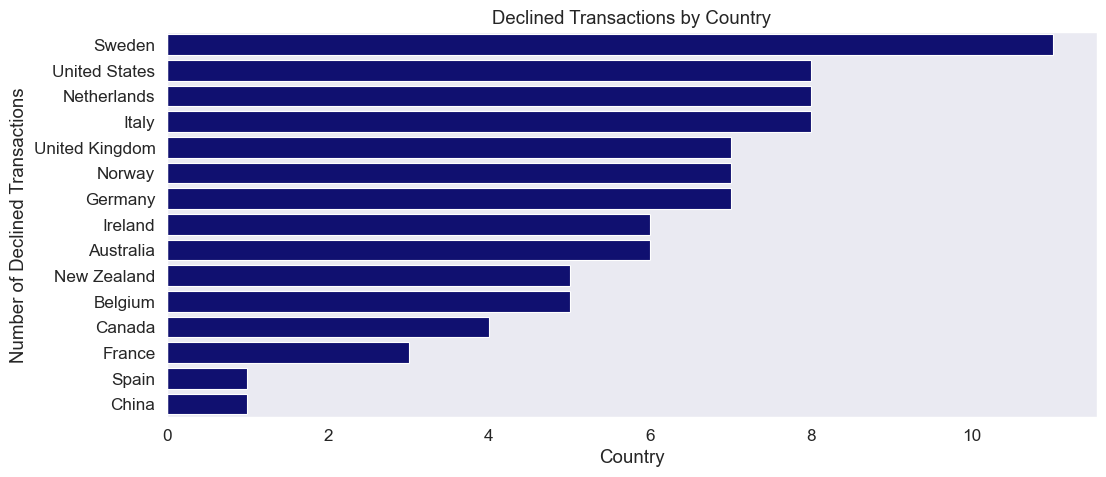

In [18]:
#this code is necessary if you want to combine information from two different tables
merged_dataTransactionsAndCompanies = transactions.merge(companies, how='inner', left_on='business_id', right_on='company_id')

# This filter for declined transactions (where declined is 1)
declined_transactions = merged_dataTransactionsAndCompanies[merged_dataTransactionsAndCompanies['declined'] == 'declined']

#This Count the number of declined transactions per country
declined_by_country = declined_transactions['country'].value_counts()


#This sets the background of the graph
sns.set_style('dark')

# This sets the font style and font size
sns.set_context('paper', font_scale=1.4)

#This sets the size of the graph
plt.figure(figsize=(12, 5))

# This is a barplot using seaborn. 
# The X-AXIS= declined_by_country.values refers to the number of declined transactions in each country.
# The Y-AXIS= declined_by_country.index refers to the names of the countries.
sns.barplot(x=declined_by_country.values, y=declined_by_country.index, color='navy')

# These are used to customize the the graph
plt.xlabel('Country')
plt.ylabel('Number of Declined Transactions')
plt.title('Declined Transactions by Country')

# This line is used to display the graph. 
plt.show()

This graph shows the declined transactions in each country. China, Spain, and France have the fewest declined transactions but also the lowest total transaction volumes. To improve performance in these countries, here are some recommendations:

1. Personalized Promotion in China: Since China is the only Asian market served, the company should adopt a culturally tailored advertising approach. Collaborating with local influencers can help build brand recognition and trust among Chinese consumers, respecting cultural differences from Western and European markets.

2. Website Language Option: Adding a Chinese language option to the website can make browsing easier for Chinese customers, improving accessibility and potentially boosting sales.

3. Targeted Campaigns for France: France’s consumers value quality and brand reputation. To increase transactions, consider limited-time promotions that highlight product quality and exclusivity. Partnering with French lifestyle influencers or bloggers can also help raise brand awareness.

4. Seasonal and Cultural Promotions in Spain: Offering special deals during major Spanish holidays, like Semana Santa or summer sales, can attract more customers. Adding loyalty rewards or referral programs could also encourage repeat purchases.

EXERCISE 6: THREE VARIABLES

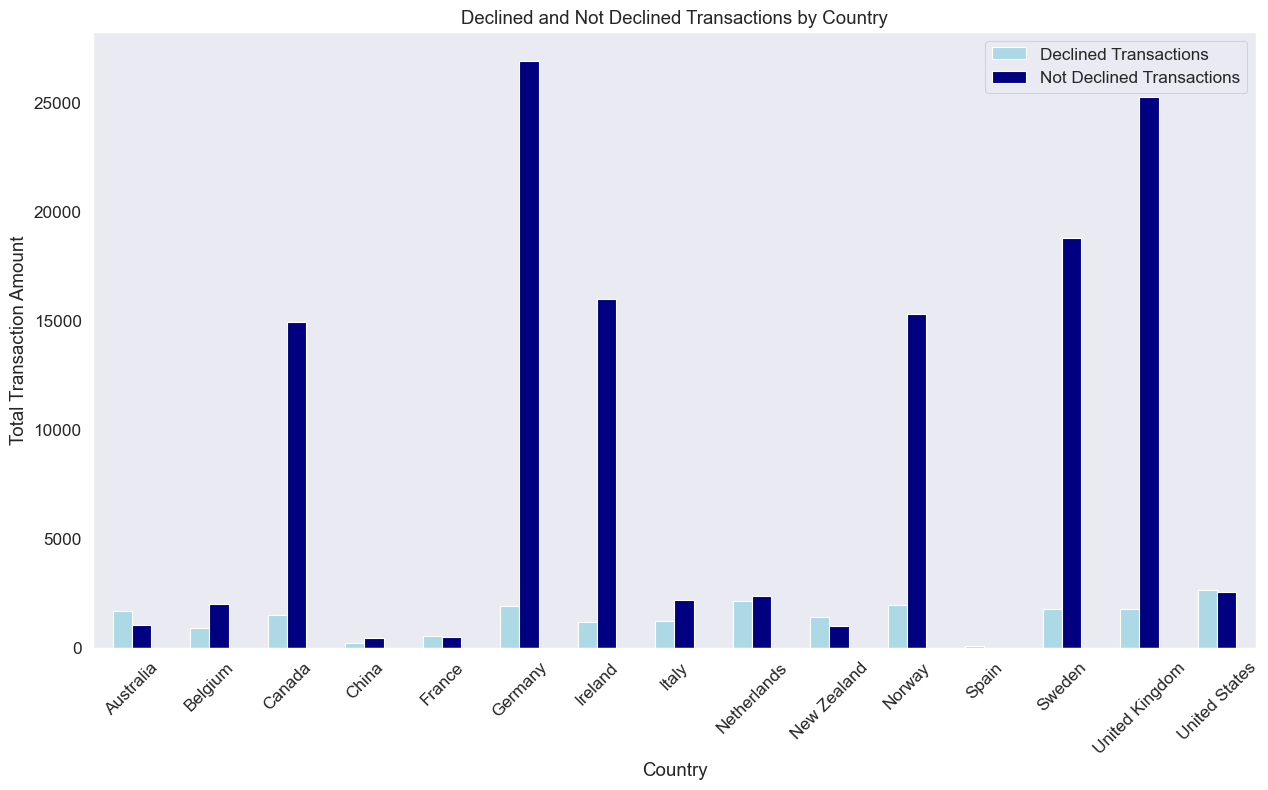

In [24]:
# This line merges two DataFrames, transactions and companies, using an inner join. 
# It matches rows where business_id in transactions matches company_id in companies.
merged_dataTransactionsAndCompanies = transactions.merge(companies, how='inner', left_on='business_id', right_on='company_id')

# This filters merged_dataTransactionsAndCompanies for rows where the declined column equals 'declined'.
#Then, it groups the filtered data by country and sums the amount column for each country.
declined_transactions = merged_dataTransactionsAndCompanies[merged_dataTransactionsAndCompanies['declined'] == 'declined'].groupby('country')['amount'].sum()

# This filters merged_dataTransactionsAndCompanies for rows where the declined column equals 'not declined'.
#Then, it groups the filtered data by country and sums the amount column for each country.
not_declined_transactions = merged_dataTransactionsAndCompanies[merged_dataTransactionsAndCompanies['declined'] == 'not declined'].groupby('country')['amount'].sum()
# This creates a new DataFrame, transaction_counts, with two columns: 'Declined Transactions' and 'Not Declined Transactions'.
# And fillna(0) is used to replace missing values. 
transaction_counts = pd.DataFrame({
    'Declined Transactions': declined_transactions,
    'Not Declined Transactions': not_declined_transactions
}).fillna(0)

# The plot function creates a bar plot with of the new dataframe: transaction_counts, with a specified size and color
transaction_counts.plot(kind='bar', figsize=(15, 8), color=['lightblue', 'navy'])

# Set overall style of the plot to a darker background
sns.set_style('dark')

# Set font style and font size
sns.set_context('paper', font_scale=1.4)

# These are used to label the bar graph. 
plt.xlabel('Country')
plt.ylabel('Total Transaction Amount')
plt.title('Declined and Not Declined Transactions by Country')
plt.xticks(rotation=45)
plt.legend()

# This line is used to display the graph. 
plt.show()


This bar chart shows the total amount of "Declined" and "Not Declined" transactions across various countries. Canada, Germany, and the United Kingdom have the highest amounts in both successful and declined transactions, indicating strong activity in these markets. Countries like China, France, and Spain have relatively low transaction amounts overall, with both declined and successful transactions being minimal.
To increase transactions and decrease declined transactions, here are some recommendations: 

1. Increase Marketing Efforts in Low-Activity Countries: To boost overall transactions, focus on growing brand presence and engagement in China, France, and Spain. This could be through localized campaigns or targeted ads.

2. Reduce Declined Transactions in Active Markets: In high-activity countries like Canada and Germany, reducing declined transactions could increase total sales. Reviewing payment processes and ensuring clear customer information might help in decreasing transaction declines.

EXERCISE 7: ONE PAIRPLOT GRAPH 

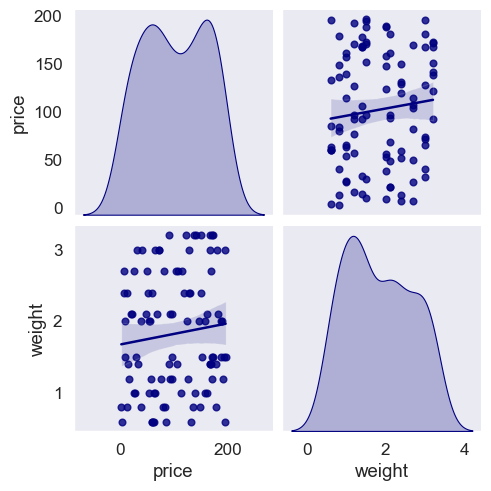

In [20]:
#This function is used to create a pairwise plot of the specified variables in the dataframe: products.
#This includes 2 variables.
#Also the kind of plot to display, in this case, kde. Then setting it to regression for off-diagonal relationships.
#plot_kws={'color': 'navy'} This changes the color for regression. 
#diag_kws={'color': 'navy'} This changes the color kde in diagonal.

sns.pairplot(products,vars=['price', 'weight'], diag_kind='kde', kind='reg',plot_kws={'color': 'navy'}, diag_kws={'color': 'navy'})   

# This line is used to display the graph. 
plt.show()

This chart shows a slight trend where heavier products tend to be a bit pricier, though it’s not a strong pattern. It also shows that product prices fall into two main groups, hinting at possible “budget” and “premium” categories.

Here are some recommendations: 
1. Market to Different Price Groups: Consider separate marketing strategies for budget vs. premium products to better reach each audience.

2. Review Pricing for Heavier Items: If heavier items aren’t offering extra value, consider adjusting their prices to stay competitive—or, if they are premium products, emphasize their quality in the marketing to justify the cost.